## librosa

In [33]:
import librosa
import librosa.display as display

import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
%matplotlib inline

import os 
import time

In [34]:
def read_captchas(path):
    wavs = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and file.endswith('.wav')]
    captchas = []
    for wav in wavs:
        signal, sampling_rate = librosa.load(os.path.join(path,wav), None)
        label = wav.split('.wav')[0]
        captchas.append((signal,sampling_rate,label))
    return captchas

In [35]:
def split_characters(captchas):
    chars = [] 
    for captcha in  captchas:
        signal = captcha[0]
        sampling_rate=captcha[1]
        label=captcha[2]
        chars += [(signal[sampling_rate*2*i:sampling_rate*2*(i+1)],sampling_rate,label[i]) for i in range(4)]
    return chars

In [36]:
def  extract_features (chars):
    data = pd.DataFrame()
    for j, char in enumerate(chars):
        signal = char[0]
        sampling_rate=char[1]
        label=char[2]
        row = pd.DataFrame()
        row['label'] = [label]
#         row['signal_mode'] = [np.mean(sp.stats.mode(signal))]
#         row['signal_min'] = [np.min(signal)]
#         row['signal_max'] = [np.max(signal)]
#         row['signal_mean'] = [np.mean(signal)]
#         row['signal_std'] = [np.std(signal)]
#         row['signal_median'] = [np.median(signal)]
#         row['signal_iqr'] = [sp.stats.iqr(signal)]
#         row['signal_kutosis'] = [sp.stats.kurtosis(signal)]
#         row['signal_skewness'] = [sp.stats.skew(signal)]   
        mfcc = librosa.feature.mfcc(signal,sampling_rate)
        for i,mfcc in enumerate(mfcc):
            row['mfcc_'+str(i)+'_mode'] = [np.mean(sp.stats.mode(mfcc))]
            row['mfcc_'+str(i)+'_min'] = [np.min(mfcc)]
            row['mfcc_'+str(i)+'_max'] = [np.max(mfcc)]
            row['mfcc_'+str(i)+'_mean'] = [np.mean(mfcc)]
            row['mfcc_'+str(i)+'_std'] = [np.std(mfcc)]
            row['mfcc_'+str(i)+'_median'] = [np.median(mfcc)]
            row['mfcc_'+str(i)+'_iqr'] = [sp.stats.iqr(mfcc)]
            row['mfcc_'+str(i)+'_kutosis'] = [sp.stats.kurtosis(mfcc)]
            row['mfcc_'+str(i)+'_skewness'] = [sp.stats.skew(mfcc)]
        data = data.append(row)
    return data.reset_index(drop=True)

In [37]:
start = time.time()
train_captchas = read_captchas('./fase_1_corrigida/base_treinamento_I')
print('read captchas: ', len(train_captchas))
train_chars = split_characters(train_captchas)
print('splited chars: ', len(train_chars))
train_data = extract_features(train_chars)
end = time.time()
print(end-start)

print('final dataframe: ', train_data.shape)
train_data.to_csv('train_data_librosa.csv',index=False)

read captchas:  200
splited chars:  800
153.75114607810974
final dataframe:  (800, 181)


In [38]:
start = time.time()
valid_captchas  = read_captchas('./fase_1_corrigida/base_validacao_I')
print('read captchas: ', len(valid_captchas))
valid_chars = split_characters(valid_captchas)
print('splited chars: ', len(valid_chars))
valid_data = extract_features(valid_chars)
end = time.time()
print(end-start)

print('final dataframe: ', valid_data.shape)
valid_data.to_csv('valid_data_librosa.csv',index=False)

read captchas:  147
splited chars:  588
122.09537196159363
final dataframe:  (588, 181)


## python_speech_features

In [39]:
import python_speech_features as psf
from python_speech_features import mfcc,fbank
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [40]:
def read_captchas_psf(path):
    files_name = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and file.endswith('.wav')]
    captchas = []
    for audio in files_name:
        sampling_rate, signal = wav.read(path+audio)
        label = audio.split('.wav')[0]
        captchas.append((signal,sampling_rate,label))
    return captchas

### mfcc_psf

In [41]:
def extract_features_mfcc_psf (chars):
    data = pd.DataFrame()
    for j, char in enumerate(chars):
        signal = char[0]
        sampling_rate=char[1]
        label=char[2]
        row = pd.DataFrame()
        row['label'] = [label]
        mfcc_psf = mfcc(signal,sampling_rate)
        for i,mfcc_psf in enumerate(mfcc_psf):
            row['mfcc_'+str(i)+'_mode'] = [np.mean(sp.stats.mode(mfcc_psf))]
            row['mfcc_'+str(i)+'_min'] = [np.min(mfcc_psf)]
            row['mfcc_'+str(i)+'_max'] = [np.max(mfcc_psf)]
            row['mfcc_'+str(i)+'_mean'] = [np.mean(mfcc_psf)]
            row['mfcc_'+str(i)+'_std'] = [np.std(mfcc_psf)]
            row['mfcc_'+str(i)+'_median'] = [np.median(mfcc_psf)]
            row['mfcc_'+str(i)+'_iqr'] = [sp.stats.iqr(mfcc_psf)]
            row['mfcc_'+str(i)+'_kutosis'] = [sp.stats.kurtosis(mfcc_psf)]
            row['mfcc_'+str(i)+'_skewness'] = [sp.stats.skew(mfcc_psf)]
        data = data.append(row)
    return data.reset_index(drop=True)

In [42]:
start = time.time()
train_captchas_psf = read_captchas_psf('./fase_1_corrigida/base_treinamento_I/')
print('read captchas: ', len(train_captchas_psf))
train_chars_psf = split_characters(train_captchas_psf)
print('splited chars: ', len(train_chars_psf))
train_data_mfcc_psf = extract_features_mfcc_psf(train_chars)
end = time.time()
print(end-start)

print('final dataframe: ', train_data_mfcc_psf.shape)
train_data_mfcc_psf.to_csv('train_data_mfcc_psf.csv',index=False)

read captchas:  200
splited chars:  800


2743.9707467556
final dataframe:  (800, 1792)


In [44]:
start = time.time()
valid_captchas_psf  = read_captchas_psf('./fase_1_corrigida/base_validacao_I/')
print('read captchas: ', len(valid_captchas_psf))
valid_chars_psf = split_characters(valid_captchas_psf)
print('splited chars: ', len(valid_chars_psf))
valid_data_mfcc_psf = extract_features_mfcc_psf(valid_chars_psf)
end = time.time()
print(end-start)

print('final dataframe: ', valid_data_mfcc_psf.shape)
valid_data_mfcc_psf.to_csv('valid_data_mfcc_psf.csv',index=False)

read captchas:  147
splited chars:  588


653.7976539134979
final dataframe:  (588, 1792)


In [ ]:
def extract_mfcc(sound):
    (rate,sig) = wav.read(StringIO.StringIO(sound))
    mfcc_feat = features.mfcc(sig,rate)
    return numpy.asarray(mfcc_feat, dtype='float32') 

In [39]:
data.shape

(184320,)

In [40]:
fs

22050

In [41]:
duracao_total = data.shape[0]/fs

In [42]:
duracao_total

8.359183673469389

In [43]:
intervalo = 1
dados_p_seg = {}
for i, ini in enumerate (range (0, data.shape[0], fs*intervalo)):
    dados_p_seg[i] = pd.Series(data[ini:(ini+fs*intervalo)])

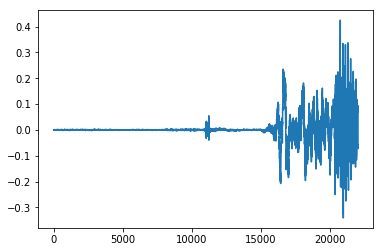

In [44]:
dados_p_seg[0].plot()

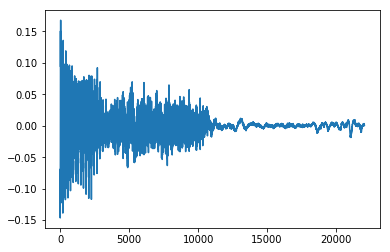

In [45]:
dados_p_seg[1].plot()

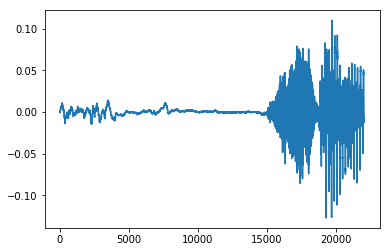

In [46]:
dados_p_seg[2].plot()

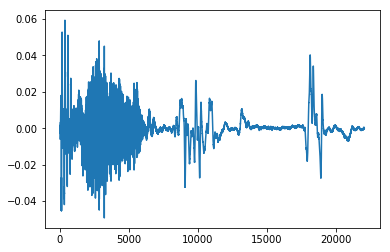

In [47]:
dados_p_seg[3].plot()

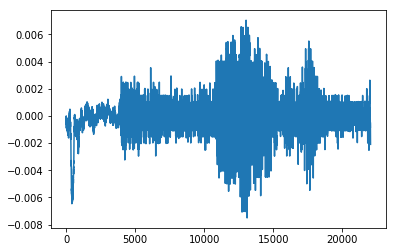

In [48]:
dados_p_seg[4].plot()

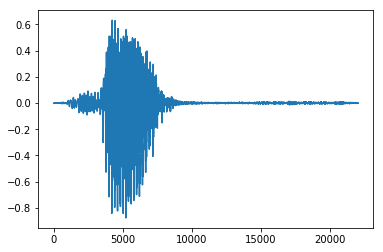

In [49]:
dados_p_seg[5].plot()

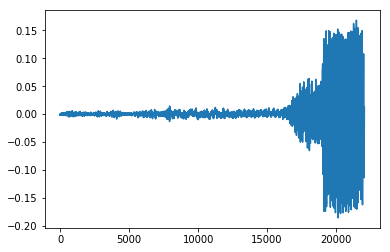

In [50]:
dados_p_seg[6].plot()

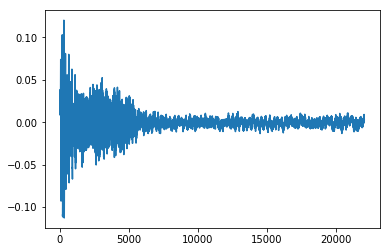

In [51]:
dados_p_seg[7].plot()

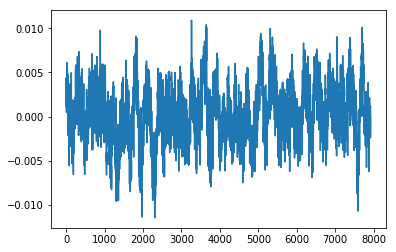

In [52]:
dados_p_seg[8].plot()